# 1.) Pull in Data and Convert ot Monthly

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [18]:
df['Diff'] = df["Adj Close"].diff().shift(-1)

In [19]:
df['Target'] = np.sign(df["Diff"])

In [20]:
df["Premium"] = .08 * df["Adj Close"]

In [21]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097591,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [23]:
X = pd.read_csv("/Users/sandinatatu/Downloads/Week 2/Xdata.csv", index_col="Date", parse_dates=["Date"])

In [24]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()

In [25]:
logreg = LogisticRegression()

logreg.fit(X,y)

y_pred = logreg.predict(X)

# 4.) Add columns, prediction and profits.

In [26]:
df["Predictions"] = y_pred

In [27]:
df["Profits"] = 0.

In [28]:
#True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] ==1), "Profits"] = df.loc[(df["Predictions"] == 1) & (df["Target"] ==1), "Premium"] 



#False Pozitives

df.loc[(df["Predictions"] == 1) & (df["Target"] ==-1), "Profits"] = 100 * df.loc[(df['Predictions'] == 1) & (df['Target']==-1),'Diff']

# 5.) Plot profits over time

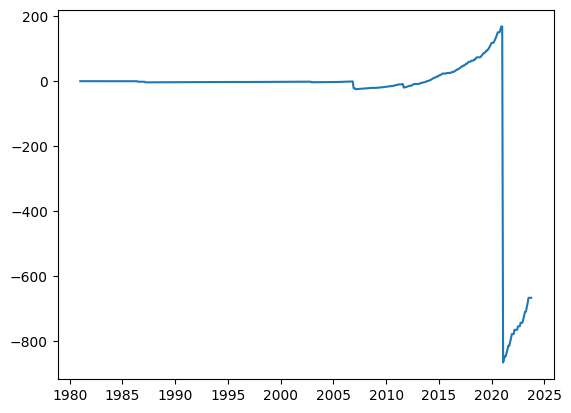

In [29]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

I believe that my financial and data science skills can be used for the projects described by PJ and Philip Liu. Since their projects are data-heavy, I can use my Python knowledge to help them organize, clean, and analyze data.